In [47]:
# Getting data from Yahoo Finance
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

tickers = ['MMM','AAPL', 'NVDA', 'BKNG', 'NFLX', 'GOOG']
for ticker in tickers:
    data = pdr.get_data_yahoo(ticker, start="2008-10-01", end="2018-08-30")

    data.to_csv('data/{}.csv'.format(ticker))
    
    print(ticker)

[*********************100%***********************]  1 of 1 downloaded
MMM
[*********************100%***********************]  1 of 1 downloaded
AAPL
[*********************100%***********************]  1 of 1 downloaded
NVDA
[*********************100%***********************]  1 of 1 downloaded
BKNG
[*********************100%***********************]  1 of 1 downloaded
NFLX
[*********************100%***********************]  1 of 1 downloaded
GOOG


In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/MMM.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,67.669998,68.309998,66.860001,67.389999,51.954803,4615700
1,2008-10-02,66.910004,67.750000,65.510002,65.599998,50.574795,7880100
2,2008-10-03,66.089996,67.250000,64.510002,64.599998,49.803844,6588000
3,2008-10-06,63.099998,64.379997,60.930000,63.000000,48.570309,10949000
4,2008-10-07,63.750000,64.500000,59.869999,59.970001,46.234310,8798100


In [4]:
training_set = dataset_train.iloc[:,5:6].values

In [5]:
training_set.shape

(2497, 1)

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


In [7]:
sc = MinMaxScaler()

In [8]:
training_set = sc.fit_transform(training_set)

In [9]:
training_set

array([[ 0.08646052],
       [ 0.08021057],
       [ 0.076719  ],
       ..., 
       [ 0.79965366],
       [ 0.80431851],
       [ 0.80323154]])

In [10]:
# Getting the inputs and the ouputs
X_train = training_set[0:2496]
y_train = training_set[1:2497]

In [11]:
# Reshaping
X_train = np.reshape(X_train, (2496, 1, 1))

In [12]:
X_train.shape

(2496, 1, 1)

In [13]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Using TensorFlow backend.


In [14]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2496/2496 [==============================] - 0s - loss: 0.0656     
Epoch 2/100
2496/2496 [==============================] - 0s - loss: 0.0624     
Epoch 3/100
2496/2496 [==============================] - 0s - loss: 0.0596     
Epoch 4/100
2496/2496 [==============================] - 0s - loss: 0.0567     
Epoch 5/100
2496/2496 [==============================] - 0s - loss: 0.0539     
Epoch 6/100
2496/2496 [==============================] - 0s - loss: 0.0509     
Epoch 7/100
2496/2496 [==============================] - 0s - loss: 0.0479     
Epoch 8/100
2496/2496 [==============================] - 0s - loss: 0.0447     
Epoch 9/100
2496/2496 [==============================] - 0s - loss: 0.0414     
Epoch 10/100
2496/2496 [==============================] - 0s - loss: 0.0378     
Epoch 11/100
2496/2496 [==============================] - 0s - loss: 0.0341     
Epoch 12/100
2496/2496 [==============================] - 0s - loss: 0.0303     
Epoch 13/100
2496/2496 [=============

2496/2496 [==============================] - 0s - loss: 4.3183e-05     
Epoch 99/100
2496/2496 [==============================] - 0s - loss: 4.3952e-05     
Epoch 100/100
2496/2496 [==============================] - 0s - loss: 4.6363e-05     


In [30]:
# Getting data from Yahoo Finance
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

tickers = ['MMM','AAPL', 'NVDA', 'BKNG', 'NFLX', 'GOOG']
for ticker in tickers:
    data = pdr.get_data_yahoo(ticker, start="2018-09-03", end="2018-09-28")

    data.to_csv('data/{}_test.csv'.format(ticker))
    
    print(ticker)

[*********************100%***********************]  1 of 1 downloaded
MMM
[*********************100%***********************]  1 of 1 downloaded
AAPL
[*********************100%***********************]  1 of 1 downloaded
NVDA
[*********************100%***********************]  1 of 1 downloaded
BKNG
[*********************100%***********************]  1 of 1 downloaded
NFLX
[*********************100%***********************]  1 of 1 downloaded
GOOG


In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/MMM_test.csv')


In [18]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,210.550003,210.750000,207.550003,208.600006,208.600006,2108500
1,2018-09-05,208.289993,211.910004,207.350006,211.830002,211.830002,1951500
2,2018-09-06,212.000000,213.369995,211.070007,212.740005,212.740005,2363500
3,2018-09-07,212.240005,212.970001,209.970001,212.570007,212.570007,2739200
4,2018-09-10,213.679993,216.369995,212.860001,212.929993,212.929993,2399700
5,2018-09-11,211.360001,212.220001,210.000000,211.779999,211.779999,1967500
6,2018-09-12,212.300003,214.759995,205.899994,206.710007,206.710007,4937000
7,2018-09-13,207.339996,209.139999,206.550003,209.050003,209.050003,2171300
8,2018-09-14,208.839996,210.300003,207.149994,207.880005,207.880005,1721600
9,2018-09-17,207.460007,210.190002,207.300003,209.529999,209.529999,1610400


In [19]:
# Part 3 - Making the predictions and visualising the results
real_stock_price = dataset_test.iloc[:, 5:6].values


# Getting the predicted stock price of 2018
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (19, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
real_stock_price

array([[ 208.600006],
       [ 211.830002],
       [ 212.740005],
       [ 212.570007],
       [ 212.929993],
       [ 211.779999],
       [ 206.710007],
       [ 209.050003],
       [ 207.880005],
       [ 209.529999],
       [ 211.529999],
       [ 213.119995],
       [ 215.270004],
       [ 216.330002],
       [ 213.509995],
       [ 210.639999],
       [ 211.070007],
       [ 210.110001],
       [ 210.710007]])

In [21]:
predicted_stock_price

array([[ 209.14929199],
       [ 212.34494019],
       [ 213.24472046],
       [ 213.07666016],
       [ 213.43252563],
       [ 212.29551697],
       [ 207.2780304 ],
       [ 209.59474182],
       [ 208.43658447],
       [ 210.06973267],
       [ 212.04826355],
       [ 213.62037659],
       [ 215.74497986],
       [ 216.79194641],
       [ 214.00584412],
       [ 211.16798401],
       [ 211.59332275],
       [ 210.64363098],
       [ 211.23721313]], dtype=float32)

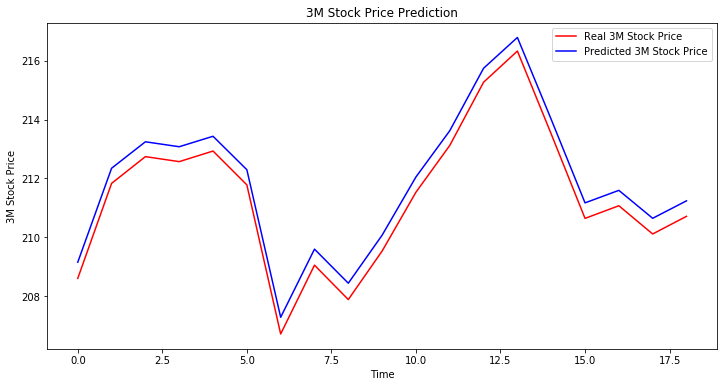

In [22]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color = 'red', label = 'Real 3M Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted 3M Stock Price')
plt.title('3M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('3M Stock Price')
plt.legend()
plt.show()

In [23]:
print(real_stock_price.shape)
print(predicted_stock_price.shape)

(19, 1)
(19, 1)


In [24]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  0.5193
RMSE: 0.5199  


In [31]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  0.2703


In [32]:
# Getting the real stock price of 2008 - 2018
real_stock_price_train = pd.read_csv('data/MMM.csv')
real_stock_price_train = real_stock_price_train.iloc[:,5:6].values

# Getting the predicted stock price of 2008 - 2018
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

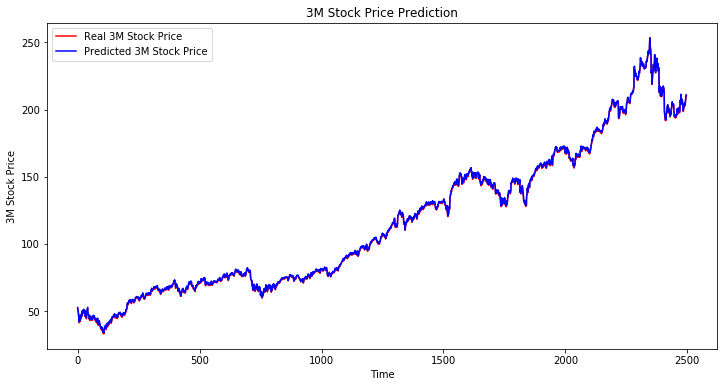

In [33]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price_train, color = 'red', label = 'Real 3M Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted 3M Stock Price')
plt.title('3M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('3M Stock Price')
plt.legend()
plt.show()

In [34]:
real_stock_price_train = real_stock_price_train[:2496]

In [35]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price_train, predicted_stock_price_train)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))))

Score
MAE:  0.5985
RMSE: 0.6096  


In [36]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price_train, predicted_stock_price_train)))

MSE:  0.3716
